# Predicting car prices

In this guided project, we'll practice the machine learning workflow you've learned so far to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile).

In [1]:
import pandas as pd
import numpy as np

In [2]:
cars = pd.read_csv('imports-85.data', header=None)

Let's check the first rows of the dataset.

In [3]:
cars.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


The column names don't match the ones in the dataset's documentation. Let's change them:

In [4]:
new_columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-syste,', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [5]:
cars.columns = new_columns

In [6]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,"fuel-syste,",bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


There are some missing values (represented with "?"). We can get information for every column:

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

There are also columns with non-numerical values and columns that are suppoused to be numeric but have 'object' type. Let's just keep just numeric columns:

In [8]:
numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_set = cars[numeric_cols]

We can replace the symbol "?" with null values:

In [9]:
numeric_set = numeric_set.replace('?', np.NaN)

Let's change the value-types:

In [10]:
numeric_set = numeric_set.astype(float)

In [11]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Since we are focusing on the price columns, let's drop rows with null values in that column

In [12]:
numeric_set = numeric_set.dropna(subset=['price'])
numeric_set.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

Even though the 'normalized-losses' columns have various columns with null values, we can't just drop them, because we would lost an important part of our set. Let's better fill null values with the mean value of each column:

In [13]:
numeric_set = numeric_set.fillna(numeric_set.mean())

In [14]:
numeric_set.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

No more null values! Let's check the dataset head again:

In [15]:
numeric_set.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


The values on the set vary from 3 to 5000. This might complicate things, we need to normalize our set, but keeping the price column:

In [16]:
price_col = numeric_set['price']
numeric_set = (numeric_set - numeric_set.min()) / numeric_set.max()
numeric_set['price'] = price_col
numeric_set.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.222656,0.016543,0.133109,0.052778,0.016722,0.260698,0.211656,0.236041,0.146283,0.086957,0.240458,0.128788,0.163265,0.203704,13495.0
1,0.222656,0.016543,0.133109,0.052778,0.016722,0.260698,0.211656,0.236041,0.146283,0.086957,0.240458,0.128788,0.163265,0.203704,16500.0
2,0.222656,0.065343,0.144642,0.072222,0.076923,0.328333,0.279141,0.035533,0.335731,0.086957,0.404580,0.128788,0.122449,0.185185,16500.0
3,0.386719,0.109181,0.170591,0.081944,0.108696,0.208805,0.147239,0.164975,0.318945,0.130435,0.206107,0.204545,0.224490,0.259259,13950.0
4,0.386719,0.105873,0.170591,0.084722,0.108696,0.328578,0.230061,0.164975,0.318945,0.043478,0.255725,0.204545,0.102041,0.111111,17450.0


Our data set is ready to use the K-Nearest Neighbors algorithm. Let's use a function that uses a dataframe, an specific column as training and other as target.
This what our function will do:
- This function will split the data set into a training and test set.
- Then, it will instantiate the KNeighborsRegressor class, fit the model on the training set, and make predictions on the test set.
- Finally, it will calculate the RMSE and return that value.

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training, target, dataframe):
    
    knn = KNeighborsRegressor()
    np.random.seed(1)

    shuffled_index = np.random.permutation(dataframe.index)
    rand_df = dataframe.reindex(shuffled_index)

    division = round(rand_df.shape[0] / 2)
    
    train_set = rand_df.iloc[0:division]
    test_set = rand_df.iloc[division:]
    
    knn.fit(train_set[[training]], train_set[target])
    
    prediction = knn.predict(test_set[[training]])
    
    rmse = (mean_squared_error(test_set[target], prediction))**0.5
    
    return rmse

We can now use our function to evaluate the performance of different columns:

In [18]:
rmse = {}
for col in numeric_set.columns[0:-1]:
    result = knn_train_test(col, 'price', numeric_set)
    rmse[col] = result
    
rmse

{'normalized-losses': 7339.675755133537,
 'wheel-base': 5461.829055407634,
 'length': 5427.739232337662,
 'width': 4830.28867816981,
 'height': 7777.109553855678,
 'curb-weight': 4389.475536772109,
 'engine-size': 3207.4707358889746,
 'bore': 6792.374629576526,
 'stroke': 7922.446942056662,
 'compression-ratio': 6610.812153159129,
 'horsepower': 4043.1872617116474,
 'peak-rpm': 7669.179297643649,
 'city-mpg': 5084.969769782704,
 'highway-mpg': 4638.344890365549}

The 'engine-size' column gave us the best result!
But, what about different number of neighbors (k)?
Let's modify our function to evaluate different k-values:

In [19]:
def knn_train_test_k(training, target, dataframe, k):
    
    knn = KNeighborsRegressor(n_neighbors=k)
    np.random.seed(1)

    shuffled_index = np.random.permutation(dataframe.index)
    rand_df = dataframe.reindex(shuffled_index)

    division = round(rand_df.shape[0] / 2)
    
    train_set = rand_df.iloc[0:division]
    test_set = rand_df.iloc[division:]
    
    knn.fit(train_set[[training]], train_set[target])
    
    prediction = knn.predict(test_set[[training]])
    
    rmse = (mean_squared_error(test_set[target], prediction))**0.5
    
    return rmse

In [20]:
k_list = [1, 3, 5, 7, 9]
rmse_k_var = {}

for col in numeric_set.columns[0:-1]:
    k_values = {}
    for k in k_list:
        result = knn_train_test_k(col, 'price', numeric_set, k)
        k_values[k] = result
        rmse_k_var[col] = k_values
    
rmse_k_var

{'normalized-losses': {1: 7836.7752643899685,
  3: 7516.084828453897,
  5: 7339.675755133537,
  7: 7759.126829130677,
  9: 7794.746366502435},
 'wheel-base': {1: 4493.734068810494,
  3: 5208.39331165465,
  5: 5461.829055407634,
  7: 5449.675584431666,
  9: 5738.838549604195},
 'length': {1: 4627.276098214684,
  3: 5126.056416168103,
  5: 5427.739232337662,
  7: 5307.107719933712,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4648.149766156945,
  5: 4830.28867816981,
  7: 4786.669877637091,
  9: 4732.438306003789},
 'height': {1: 8751.160007407449,
  3: 8121.165102604576,
  5: 7777.109553855678,
  7: 7696.6194288959905,
  9: 7764.283615550521},
 'curb-weight': {1: 5264.290230758878,
  3: 5011.8789151002,
  5: 4389.475536772109,
  7: 4329.525204670641,
  9: 4633.425879994758},
 'engine-size': {1: 3508.9358023974355,
  3: 2811.568296721371,
  5: 3207.4707358889746,
  7: 3526.6233142492247,
  9: 3769.278817046521},
 'bore': {1: 8602.58848450066,
  3: 6985.493315692625,
  5

It's hard to analize results like this, we can visualize differences if we make a line plot:

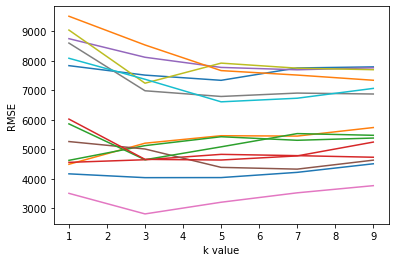

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in rmse_k_var.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

We can see now that the best k-value is around 5.
Even though our current function works fine, KNN algorithm can use multiple columns. Let's modify our function so it can accept multiple columns. For this step, it might be useful to know what columns performed the best:

In [22]:
rmse_per_feature = {}

for feature, k_dict in rmse_k_var.items():
    avg_rmse = np.mean(list(k_dict.values()))
    rmse_per_feature[feature] = avg_rmse
    
avg_rmse_feature = pd.Series(rmse_per_feature)
avg_rmse_feature = avg_rmse_feature.sort_values()
sorted_features = avg_rmse_feature.index

In [23]:
def knn_train_test_cols(training_cols, target, dataframe):
    
    knn = KNeighborsRegressor()
    np.random.seed(1)

    shuffled_index = np.random.permutation(dataframe.index)
    rand_df = dataframe.reindex(shuffled_index)

    division = round(rand_df.shape[0] / 2)
    
    train_set = rand_df.iloc[0:division]
    test_set = rand_df.iloc[division:]
    
    knn.fit(train_set[training_cols], train_set[target])
    
    prediction = knn.predict(test_set[training_cols])
    
    rmse = (mean_squared_error(test_set[target], prediction))**0.5
    
    return rmse

In [24]:
mult_col_results = {}

for best_feature in range(2,7):
    result = knn_train_test_cols(sorted_features[:best_feature], 'price', numeric_set)
    mult_col_results["{} best features".format(best_feature)] = result
    
mult_col_results

{'2 best features': 2900.4015470719614,
 '3 best features': 2898.110483923914,
 '4 best features': 3368.6015941042924,
 '5 best features': 3258.950122932595,
 '6 best features': 3257.14791123209}

The algorithm works better when choosing 3 features. Let's now explore what happens when varying k value from one to 24!:

In [25]:
def knn_train_test_k(training_cols, target, dataframe, k):
    
    knn = KNeighborsRegressor(n_neighbors=k)
    np.random.seed(1)

    shuffled_index = np.random.permutation(dataframe.index)
    rand_df = dataframe.reindex(shuffled_index)

    division = round(rand_df.shape[0] / 2)
    
    train_set = rand_df.iloc[0:division]
    test_set = rand_df.iloc[division:]
    
    knn.fit(train_set[training_cols], train_set[target])
    
    prediction = knn.predict(test_set[training_cols])
    
    rmse = (mean_squared_error(test_set[target], prediction))**0.5
    
    return rmse

In [26]:
k_list_2 = list(range(1, 25))
rmse_k_var_mult_feat = {}

for best_feature in range(2,7):
    k_values = {}
    for k in k_list_2:
        result = knn_train_test_k(sorted_features[:best_feature], 'price', numeric_set, k)
        k_values[k] = result
        rmse_k_var_mult_feat["{} best features".format(best_feature)] = k_values
    
rmse_k_var_mult_feat

{'2 best features': {1: 2924.619293156118,
  2: 2745.39690452334,
  3: 2777.9207077859282,
  4: 2724.2243297200425,
  5: 2900.4015470719614,
  6: 3086.1927305997983,
  7: 3148.081702327017,
  8: 3434.074039214491,
  9: 3813.325694917611,
  10: 4053.6474176027723,
  11: 4151.537475554328,
  12: 4282.132286811639,
  13: 4362.213619108773,
  14: 4408.583207912848,
  15: 4532.576911460613,
  16: 4673.232616350018,
  17: 4745.51797014773,
  18: 4804.060477703455,
  19: 4851.63624582897,
  20: 4847.484872751993,
  21: 4823.285261135753,
  22: 4826.387004099204,
  23: 4848.884672513087,
  24: 4881.555821747627},
 '3 best features': {1: 2708.8342968008865,
  2: 2583.0856921653426,
  3: 2858.7539772653145,
  4: 2797.6321536397895,
  5: 2898.110483923914,
  6: 3009.009067667781,
  7: 3063.499982545977,
  8: 3359.7861829869253,
  9: 3599.3452103858676,
  10: 3893.1658654164175,
  11: 4037.6899323970924,
  12: 4172.274742555341,
  13: 4277.2840819084295,
  14: 4379.497258195549,
  15: 4451.3870682

Let's now plot the results:

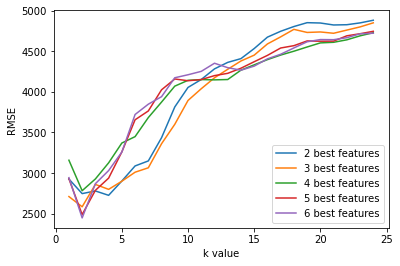

In [27]:
for k,v in rmse_k_var_mult_feat.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()
plt.show()

We can tell now that is better to use all features but only a k value of 2.